In [3]:
# create some data using linear regression forumala y = weight * X + bias

In [4]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


cuda


In [5]:
import torch
from torch import nn
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

#create X and y (features and labels)
# capital X becuase X is a feature matrix
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[0:10], y[0:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """Plot training data, test data and compute predictions"""
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b',s=4,label='Train Data')
    plt.scatter(test_data, test_labels, c='g',s=4,label='Test Data')
    if predictions is not None:
        # plot predictions if exist
        plt.scatter(test_data, predictions, c='r',s=4,label='Predictions')
    plt.legend(prop={'size':14})

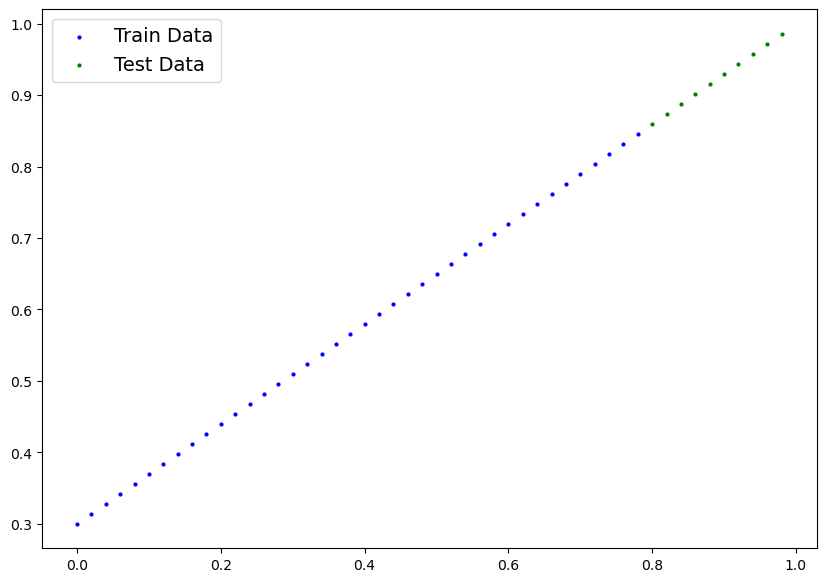

In [8]:
import matplotlib.pyplot as plt
# plot your data
plot_predictions(X_train, y_train, X_test, y_test)

In [9]:
# create a linear model by subclassing nn.Module
class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        # use nn.Linear() for creating model parameters
        # aka linear transform, probing layer fully connected layer, etc.
        self.linear_layer = nn.Linear(in_features=1,
                                    out_features=1)
    def forward(self, x: torch.Tensor) ->torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1, model_1.state_dict()

(LinearRegressionV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [10]:
next(model_1.parameters()).device

device(type='cpu')

In [11]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [12]:
# for training:
# loss function, optimizer, training loop and testing loop

In [13]:
# setup loss function
loss_fn = nn.L1Loss()

# optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)



In [14]:
# training loop
torch.manual_seed(42)
epochs = 200

# put data on target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

    model_1.train()

    # forward pass
    # pass in training dat through model
    # goes through linear regression formula
    y_pred = model_1(X_train)

    # calculate the loss
    # loss is how wrong the model predictions are
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    # accumulate gradients behind the scenes 
    optimizer.zero_grad()

    # optimizer step
    # do back propagation here, goes backwards, calculating gradiients for the loss function 
    # with respect for each parameters 
    loss.backward()

    optimizer.step()

    # testing
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch{epoch} | Loss {loss}| Test loss {test_loss}")
    


Epoch0 | Loss 0.5551779866218567| Test loss 0.5739762187004089
Epoch10 | Loss 0.439968079328537| Test loss 0.4392664134502411
Epoch20 | Loss 0.3247582018375397| Test loss 0.30455657839775085
Epoch30 | Loss 0.20954833924770355| Test loss 0.16984669864177704
Epoch40 | Loss 0.09433845430612564| Test loss 0.03513690456748009
Epoch50 | Loss 0.023886388167738914| Test loss 0.04784907028079033
Epoch60 | Loss 0.019956795498728752| Test loss 0.045803118497133255
Epoch70 | Loss 0.016517987474799156| Test loss 0.037530567497015
Epoch80 | Loss 0.013089174404740334| Test loss 0.02994490973651409
Epoch90 | Loss 0.009653178043663502| Test loss 0.02167237363755703
Epoch100 | Loss 0.006215683650225401| Test loss 0.014086711220443249
Epoch110 | Loss 0.00278724217787385| Test loss 0.005814164876937866
Epoch120 | Loss 0.0012645035749301314| Test loss 0.013801801018416882
Epoch130 | Loss 0.0012645035749301314| Test loss 0.013801801018416882
Epoch140 | Loss 0.0012645035749301314| Test loss 0.013801801018416

In [15]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [16]:
model_1.eval()

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [17]:
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

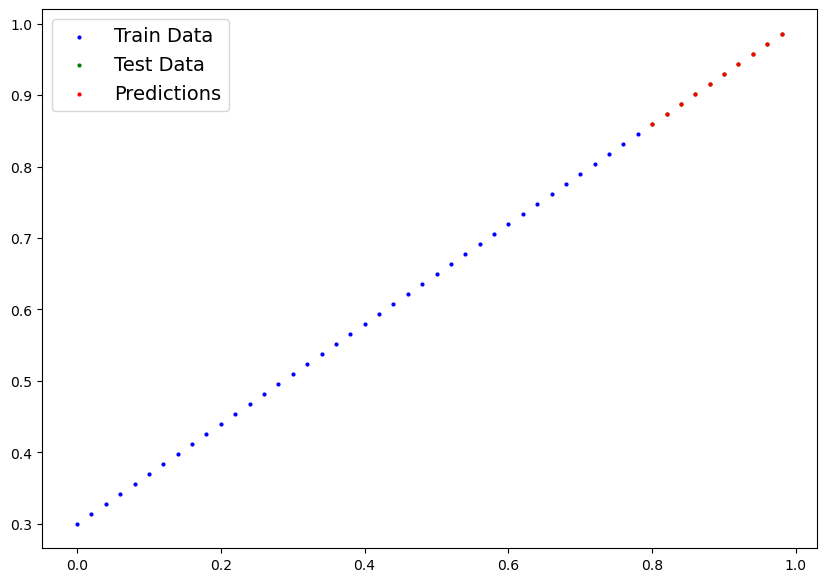

In [19]:
plot_predictions(predictions=y_preds.cpu())

In [23]:
from pathlib import Path
# create model dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# save model state dict
print(f"save to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH
          )


save to: models/01_pytorch_workflow_model_1.pth


In [25]:
# load pytorch model
loaded_model_1 = LinearRegressionV2()

# load the model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [26]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [27]:
# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')